<a href="https://colab.research.google.com/github/aso1901103/AI_tech2020/blob/master/family_income_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### データを見る

In [ ]:
#データ分析ライブラリ
import pandas as pd
#数値処理に便利
import numpy as np
#図にする
import matplotlib.pyplot as plt
#notebook上に図を描く時に必要
%matplotlib inline

In [ ]:
#データの読み込み(区切りは',')
df_f = pd.read_csv("Family Income and Expenditure.csv",delimiter=",")

In [ ]:
#列名の確認
df_f.columns

Index(['Total Household Income', 'Region', 'Total Food Expenditure',
       'Main Source of Income', 'Agricultural Household indicator',
       'Bread and Cereals Expenditure', 'Total Rice Expenditure',
       'Meat Expenditure', 'Total Fish and  marine products Expenditure',
       'Fruit Expenditure', 'Vegetables Expenditure',
       'Restaurant and hotels Expenditure', 'Alcoholic Beverages Expenditure',
       'Tobacco Expenditure', 'Clothing, Footwear and Other Wear Expenditure',
       'Housing and water Expenditure', 'Imputed House Rental Value',
       'Medical Care Expenditure', 'Transportation Expenditure',
       'Communication Expenditure', 'Education Expenditure',
       'Miscellaneous Goods and Services Expenditure',
       'Special Occasions Expenditure', 'Crop Farming and Gardening expenses',
       'Total Income from Entrepreneurial Acitivites', 'Household Head Sex',
       'Household Head Age', 'Household Head Marital Status',
       'Household Head Highest Grade Compl

In [ ]:
#列名の指定
df_f['Total Household Income']

0        480332
1        198235
2         82785
3        107589
4        189322
          ...  
41539    119773
41540    137320
41541    133171
41542    129500
41543    128598
Name: Total Household Income, Length: 41544, dtype: int64

In [ ]:
#要素数や型を表示
df_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41544 entries, 0 to 41543
Data columns (total 60 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Total Household Income                         41544 non-null  int64 
 1   Region                                         41544 non-null  object
 2   Total Food Expenditure                         41544 non-null  int64 
 3   Main Source of Income                          41544 non-null  object
 4   Agricultural Household indicator               41544 non-null  int64 
 5   Bread and Cereals Expenditure                  41544 non-null  int64 
 6   Total Rice Expenditure                         41544 non-null  int64 
 7   Meat Expenditure                               41544 non-null  int64 
 8   Total Fish and  marine products Expenditure    41544 non-null  int64 
 9   Fruit Expenditure                              41544 non-null

In [ ]:
#前から5個を表示
df_f.head()

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,Vegetables Expenditure,Restaurant and hotels Expenditure,Alcoholic Beverages Expenditure,Tobacco Expenditure,"Clothing, Footwear and Other Wear Expenditure",Housing and water Expenditure,Imputed House Rental Value,Medical Care Expenditure,Transportation Expenditure,Communication Expenditure,Education Expenditure,Miscellaneous Goods and Services Expenditure,Special Occasions Expenditure,Crop Farming and Gardening expenses,Total Income from Entrepreneurial Acitivites,Household Head Sex,Household Head Age,Household Head Marital Status,Household Head Highest Grade Completed,Household Head Job or Business Indicator,Household Head Occupation,Household Head Class of Worker,Type of Household,Total Number of Family members,Members with age less than 5 year old,Members with age 5 - 17 years old,Total number of family members employed,Type of Building/House,Type of Roof,Type of Walls,House Floor Area,House Age,Number of bedrooms,Tenure Status,Toilet Facilities,Electricity,Main Source of Water Supply,Number of Television,Number of CD/VCD/DVD,Number of Component/Stereo set,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,13460,3000,0,0,4607,63636,30000,3457,4776,2880,36200,34056,7200,19370,44370,Female,49,Single,Teacher Training and Education Sciences Programs,With Job/Business,General elementary education teaching professi...,Worked for government/government corporation,Extended Family,4,0,1,1,Single house,"Strong material(galvanized,iron,al,tile,concre...",Strong,80,75,3,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, used exclusiv...",1,"Own use, faucet, community water system",1,1,0,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,7833,2360,960,2132,8230,41370,27000,3520,12900,5700,29300,9150,1500,0,0,Male,40,Married,Transport Services Programs,With Job/Business,Transport conductors,Worked for private establishment,Single Family,3,0,1,2,Single house,"Strong material(galvanized,iron,al,tile,concre...",Strong,42,15,2,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, used exclusiv...",1,"Own use, faucet, community water system",1,1,1,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,3795,4545,270,4525,2735,14340,7200,70,324,420,425,6450,500,0,0,Male,39,Married,Grade 3,With Job/Business,Farmhands and laborers,Worked for private establishment,Single Family,6,0,4,3,Single house,"Light material (cogon,nipa,anahaw)",Light,35,12,1,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, shared with o...",0,"Shared, faucet, community water system",0,0,0,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,7887,6280,480,0,1390,16638,6600,60,6840,660,300,3762,500,15580,15580,Male,52,Married,Elementary Graduate,With Job/Business,Rice farmers,Employer in own family-operated farm or business,Single Family,3,0,3,2,Single house,"Light material (cogon,nipa,anahaw)",Light,30,15,1,Own or owner-like possession of house and lot,Closed pit,1,"Own use, faucet, community water system",1,0,0,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,11260,6400,1040,0,4620,31122,16800,140,6996,2100,0,8472,1000,18887,75687,Male,65,Married,Elementary Graduate,With Job/Business,General managers/managing proprietors in trans...,Self-employed wihout any employee,Single Family,4,0,0,2,Single house,"Light material (cogon,nipa,an

In [ ]:
#変数の統計
df_f.describe()

,Total Household Income,Total Food Expenditure,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,Vegetables Expenditure,Restaurant and hotels Expenditure,Alcoholic Beverages Expenditure,Tobacco Expenditure,"Clothing, Footwear and Other Wear Expenditure",Housing and water Expenditure,Imputed House Rental Value,Medical Care Expenditure,Transportation Expenditure,Communication Expenditure,Education Expenditure,Miscellaneous Goods and Services Expenditure,Special Occasions Expenditure,Crop Farming and Gardening expenses,Total Income from Entrepreneurial Acitivites,Household Head Age,Total Number of Family members,Members with age less than 5 year old,Members with age 5 - 17 years old,Total number of family members employed,House Floor Area,House Age,Number of bedrooms,Electricity,Number of Television,Number of CD/VCD/DVD,Number of Component/Stereo set,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
count,4.154400e+04,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,4.154400e+04,4.154400e+04,4.154400e+04,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,4.154400e+04,4.154400e+04,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000
mean,2.475556e+05,85099.158194,0.429858,25133.723642,18195.825005,10540.072574,10529.318337,2550.474990,5006.918568,15436.566075,1085.068121,2294.736183,4954.621076,3.837547e+04,2.092154e+04,7.160231e+03,11806.344454,4095.492057,7473.500481,12522.071635,5265.726001,1.381686e+04,5.437624e+04,51.381451,4.635182,0.410216,1.362579,1.272699,55.603360,20.125505,1.788008,0.890815,0.856875,0.435225,0.162141,0.394184,0.319806,0.129814,0.081215,0.060610,1.905738,0.315015,0.135038,0.013119,0.289885
std,2.868805e+05,51637.947682,0.676666,13466.482984,11727.224350,10497.727757,7812.201613,2969.752879,3300.175236,23705.195929,2174.431913,3998.977131,7496.500945,5.311168e+04,3.937152e+04,2.690200e+04,19351.213715,7298.822614,21219.170907,17547.027921,13279.593681,4.764378e+04,1.471428e+05,14.166081,2.280252,0.694390,1.408000,1.149152,55.023165,14.295452,1.105664,0.311875,0.646306,0.560125,0.389108,0.537025,0.478482,0.448673,0.346786,0.276732,1.558130,0.739698,0.354083,0.127171,0.558408
min,1.128500e+04,2947.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.950000e+03,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,9.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.048950e+05,51017.250000,0.000000,16556.000000,11020.000000,3353.750000,5504.000000,1024.750000,2873.000000,1930.000000,0.000000,0.000000,1365.000000,1.308000e+04,6.000000e+03,3.000000e+02,2412.000000,564.000000,0.000000,3792.000000,0.000000,0.000000e+00,0.000000e+00,41.000000,3.000000,0.000000,0.000000,0.000000,25.000000,10.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.640795e+05,72985.500000,0.000000,23324.000000,16620.000000,7332.500000,8695.000000,1820.000000,4314.000000,7314.000000,270.000000,300.000000,2740.000000,2.299200e+04,1.080000e+04,1.125000e+03,6036.000000,1506.000000,880.000000,6804.000000,1

### one-hotしたい

In [ ]:
#one-hot
df = pd.Series(df_f['Region'])
df = pd.get_dummies(df_f)
df

,Total Household Income,Total Food Expenditure,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,Vegetables Expenditure,Restaurant and hotels Expenditure,Alcoholic Beverages Expenditure,Tobacco Expenditure,"Clothing, Footwear and Other Wear Expenditure",Housing and water Expenditure,Imputed House Rental Value,Medical Care Expenditure,Transportation Expenditure,Communication Expenditure,Education Expenditure,Miscellaneous Goods and Services Expenditure,Special Occasions Expenditure,Crop Farming and Gardening expenses,Total Income from Entrepreneurial Acitivites,Household Head Age,Total Number of Family members,Members with age less than 5 year old,Members with age 5 - 17 years old,Total number of family members employed,House Floor Area,House Age,Number of bedrooms,Electricity,Number of Television,Number of CD/VCD/DVD,Number of Component/Stereo set,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,...,"Type of Roof_Light material (cogon,nipa,anahaw)",Type of Roof_Mixed but predominantly light materials,Type of Roof_Mixed but predominantly salvaged materials,Type of Roof_Mixed but predominantly strong materials,Type of Roof_Not Applicable,Type of Roof_Salvaged/makeshift materials,"Type of Roof_Strong material(galvanized,iron,al,tile,concrete,brick,stone,asbestos)",Type of Walls_Light,Type of Walls_NOt applicable,Type of Walls_Quite Strong,Type of Walls_Salvaged,Type of Walls_Strong,Type of Walls_Very Light,Tenure Status_Not Applicable,"Tenure Status_Own house, rent lot","Tenure Status_Own house, rent-free lot with consent of owner","Tenure Status_Own house, rent-free lot without consent of owner",Tenure Status_Own or owner-like possession of house and lot,Tenure Status_Rent house/room including lot,Tenure Status_Rent-free house and lot with consent of owner,Tenure Status_Rent-free house and lot without consent of owner,Toilet Facilities_Closed pit,Toilet Facilities_None,Toilet Facilities_Open pit,Toilet Facilities_Others,"Toilet Facilities_Water-sealed, other depository, shared with other household","Toilet Facilities_Water-sealed, other depository, used exclusively by household","Toilet Facilities_Water-sealed, sewer septic tank, shared with other household","Toilet Facilities_Water-sealed, sewer septic tank, used exclusively by household",Main Source of Water Supply_Dug well,"Main Source of Water Supply_Lake, river, rain and others",Main Source of Water Supply_Others,"Main Source of Water Supply_Own use, faucet, community water system","Main Source of Water Supply_Own use, tubed/piped deep well",Main Source of Water Supply_Peddler,"Main Source of Water Supply_Protected spring, river, stream, etc","Main Source of Water Supply_Shared, faucet, community water system","Main Source of Water Supply_Shared, tubed/piped deep well",Main Source of Water Supply_Tubed/piped shallow well,"Main Source of Water Supply_Unprotected spring, river, stream, etc"
0,480332,117848,0,42140,38300,24676,16806,3325,13460,3000,0,0,4607,63636,30000,3457,4776,2880,36200,34056,7200,19370,44370,49,4,0,1,1,80,75,3,1,1,1,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
1,198235,67766,0,17329,13008,17434,11073,2035,7833,2360,960,2132,8230,41370,27000,3520,12900,5700,29300,9150,1500,0,0,40,3,0,1,2,42,15,2,1,1,1,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
2,82785,61609,1,34182,32001,7783,2590,1730,3795,4545,270,4525,2735,14340,7200,70,324,420,425,6450,500,0,0,39,6,0,4,3,35,12,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,107589,78189,0,34030,28659,10914,10812,690,7887,6280,480,0,1390,16638,6600,60,6840,660,300,3762,500,15580,15580,52,3,0,3,2,30,15,1,1,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0,0,0,0,0,

In [ ]:
#短縮した
pd.get_dummies(pd.Series(df_f['Region']))

,ARMM,CAR,Caraga,I - Ilocos Region,II - Cagayan Valley,III - Central Luzon,IVA - CALABARZON,IVB - MIMAROPA,IX - Zasmboanga Peninsula,NCR,V - Bicol Region,VI - Western Visayas,VII - Central Visayas,VIII - Eastern Visayas,X - Northern Mindanao,XI - Davao Region,XII - SOCCSKSARGEN
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41539,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
41540,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
41541,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
41542,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
X = df[df.columns]
X

,Total Household Income,Total Food Expenditure,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,Vegetables Expenditure,Restaurant and hotels Expenditure,Alcoholic Beverages Expenditure,Tobacco Expenditure,"Clothing, Footwear and Other Wear Expenditure",Housing and water Expenditure,Imputed House Rental Value,Medical Care Expenditure,Transportation Expenditure,Communication Expenditure,Education Expenditure,Miscellaneous Goods and Services Expenditure,Special Occasions Expenditure,Crop Farming and Gardening expenses,Total Income from Entrepreneurial Acitivites,Household Head Age,Total Number of Family members,Members with age less than 5 year old,Members with age 5 - 17 years old,Total number of family members employed,House Floor Area,House Age,Number of bedrooms,Electricity,Number of Television,Number of CD/VCD/DVD,Number of Component/Stereo set,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,...,"Type of Roof_Light material (cogon,nipa,anahaw)",Type of Roof_Mixed but predominantly light materials,Type of Roof_Mixed but predominantly salvaged materials,Type of Roof_Mixed but predominantly strong materials,Type of Roof_Not Applicable,Type of Roof_Salvaged/makeshift materials,"Type of Roof_Strong material(galvanized,iron,al,tile,concrete,brick,stone,asbestos)",Type of Walls_Light,Type of Walls_NOt applicable,Type of Walls_Quite Strong,Type of Walls_Salvaged,Type of Walls_Strong,Type of Walls_Very Light,Tenure Status_Not Applicable,"Tenure Status_Own house, rent lot","Tenure Status_Own house, rent-free lot with consent of owner","Tenure Status_Own house, rent-free lot without consent of owner",Tenure Status_Own or owner-like possession of house and lot,Tenure Status_Rent house/room including lot,Tenure Status_Rent-free house and lot with consent of owner,Tenure Status_Rent-free house and lot without consent of owner,Toilet Facilities_Closed pit,Toilet Facilities_None,Toilet Facilities_Open pit,Toilet Facilities_Others,"Toilet Facilities_Water-sealed, other depository, shared with other household","Toilet Facilities_Water-sealed, other depository, used exclusively by household","Toilet Facilities_Water-sealed, sewer septic tank, shared with other household","Toilet Facilities_Water-sealed, sewer septic tank, used exclusively by household",Main Source of Water Supply_Dug well,"Main Source of Water Supply_Lake, river, rain and others",Main Source of Water Supply_Others,"Main Source of Water Supply_Own use, faucet, community water system","Main Source of Water Supply_Own use, tubed/piped deep well",Main Source of Water Supply_Peddler,"Main Source of Water Supply_Protected spring, river, stream, etc","Main Source of Water Supply_Shared, faucet, community water system","Main Source of Water Supply_Shared, tubed/piped deep well",Main Source of Water Supply_Tubed/piped shallow well,"Main Source of Water Supply_Unprotected spring, river, stream, etc"
0,480332,117848,0,42140,38300,24676,16806,3325,13460,3000,0,0,4607,63636,30000,3457,4776,2880,36200,34056,7200,19370,44370,49,4,0,1,1,80,75,3,1,1,1,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
1,198235,67766,0,17329,13008,17434,11073,2035,7833,2360,960,2132,8230,41370,27000,3520,12900,5700,29300,9150,1500,0,0,40,3,0,1,2,42,15,2,1,1,1,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
2,82785,61609,1,34182,32001,7783,2590,1730,3795,4545,270,4525,2735,14340,7200,70,324,420,425,6450,500,0,0,39,6,0,4,3,35,12,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,107589,78189,0,34030,28659,10914,10812,690,7887,6280,480,0,1390,16638,6600,60,6840,660,300,3762,500,15580,15580,52,3,0,3,2,30,15,1,1,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0,0,0,0,0,

In [ ]:
cols = list(X.columns[X.dtypes == object])
X = pd.DataFrame(pd.get_dummies(X, prefix=cols, columns=cols))
X

,Total Household Income,Total Food Expenditure,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,Vegetables Expenditure,Restaurant and hotels Expenditure,Alcoholic Beverages Expenditure,Tobacco Expenditure,"Clothing, Footwear and Other Wear Expenditure",Housing and water Expenditure,Imputed House Rental Value,Medical Care Expenditure,Transportation Expenditure,Communication Expenditure,Education Expenditure,Miscellaneous Goods and Services Expenditure,Special Occasions Expenditure,Crop Farming and Gardening expenses,Total Income from Entrepreneurial Acitivites,Household Head Age,Total Number of Family members,Members with age less than 5 year old,Members with age 5 - 17 years old,Total number of family members employed,House Floor Area,House Age,Number of bedrooms,Electricity,Number of Television,Number of CD/VCD/DVD,Number of Component/Stereo set,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,...,"Type of Roof_Light material (cogon,nipa,anahaw)",Type of Roof_Mixed but predominantly light materials,Type of Roof_Mixed but predominantly salvaged materials,Type of Roof_Mixed but predominantly strong materials,Type of Roof_Not Applicable,Type of Roof_Salvaged/makeshift materials,"Type of Roof_Strong material(galvanized,iron,al,tile,concrete,brick,stone,asbestos)",Type of Walls_Light,Type of Walls_NOt applicable,Type of Walls_Quite Strong,Type of Walls_Salvaged,Type of Walls_Strong,Type of Walls_Very Light,Tenure Status_Not Applicable,"Tenure Status_Own house, rent lot","Tenure Status_Own house, rent-free lot with consent of owner","Tenure Status_Own house, rent-free lot without consent of owner",Tenure Status_Own or owner-like possession of house and lot,Tenure Status_Rent house/room including lot,Tenure Status_Rent-free house and lot with consent of owner,Tenure Status_Rent-free house and lot without consent of owner,Toilet Facilities_Closed pit,Toilet Facilities_None,Toilet Facilities_Open pit,Toilet Facilities_Others,"Toilet Facilities_Water-sealed, other depository, shared with other household","Toilet Facilities_Water-sealed, other depository, used exclusively by household","Toilet Facilities_Water-sealed, sewer septic tank, shared with other household","Toilet Facilities_Water-sealed, sewer septic tank, used exclusively by household",Main Source of Water Supply_Dug well,"Main Source of Water Supply_Lake, river, rain and others",Main Source of Water Supply_Others,"Main Source of Water Supply_Own use, faucet, community water system","Main Source of Water Supply_Own use, tubed/piped deep well",Main Source of Water Supply_Peddler,"Main Source of Water Supply_Protected spring, river, stream, etc","Main Source of Water Supply_Shared, faucet, community water system","Main Source of Water Supply_Shared, tubed/piped deep well",Main Source of Water Supply_Tubed/piped shallow well,"Main Source of Water Supply_Unprotected spring, river, stream, etc"
0,480332,117848,0,42140,38300,24676,16806,3325,13460,3000,0,0,4607,63636,30000,3457,4776,2880,36200,34056,7200,19370,44370,49,4,0,1,1,80,75,3,1,1,1,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
1,198235,67766,0,17329,13008,17434,11073,2035,7833,2360,960,2132,8230,41370,27000,3520,12900,5700,29300,9150,1500,0,0,40,3,0,1,2,42,15,2,1,1,1,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
2,82785,61609,1,34182,32001,7783,2590,1730,3795,4545,270,4525,2735,14340,7200,70,324,420,425,6450,500,0,0,39,6,0,4,3,35,12,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,107589,78189,0,34030,28659,10914,10812,690,7887,6280,480,0,1390,16638,6600,60,6840,660,300,3762,500,15580,15580,52,3,0,3,2,30,15,1,1,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0,0,0,0,0,

### グラフ化してみる

(array([2.5471e+04, 1.3319e+04, 2.2140e+03, 4.0500e+02, 9.3000e+01,
        2.2000e+01, 9.0000e+00, 4.0000e+00, 5.0000e+00, 2.0000e+00]),
 array([  2947. ,  85408.8, 167870.6, 250332.4, 332794.2, 415256. ,
        497717.8, 580179.6, 662641.4, 745103.2, 827565. ]),
 <a list of 10 Patch objects>)

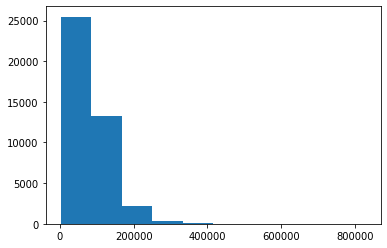

In [ ]:
plt.hist(df_f['Total Food Expenditure'])

In [ ]:
#件数のみの取得
df_f['Total Household Income'].value_counts()

156600     5
170400     5
146320     5
72120      4
89740      4
          ..
565677     1
454705     1
1056298    1
556731     1
452175     1
Name: Total Household Income, Length: 38670, dtype: int64

### 散布図を描く

Text(0, 0.5, 'Total Food Expenditure')

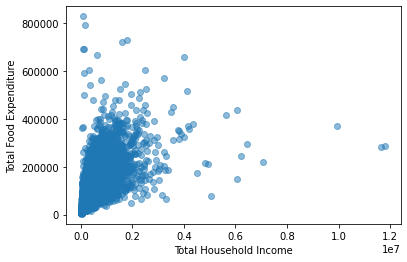

In [ ]:
#scatterを使う(一つ目がx軸、二つ目がy軸)
plt.scatter(df_f['Total Household Income'],df_f['Total Food Expenditure'],alpha=0.5)
#ラベルの付与
plt.xlabel("Total Household Income")
plt.ylabel("Total Food Expenditure")

In [ ]:
#ヒートマップで相関を見る
cor_f = df_f.corr()
cor_f

,Total Household Income,Total Food Expenditure,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,Vegetables Expenditure,Restaurant and hotels Expenditure,Alcoholic Beverages Expenditure,Tobacco Expenditure,"Clothing, Footwear and Other Wear Expenditure",Housing and water Expenditure,Imputed House Rental Value,Medical Care Expenditure,Transportation Expenditure,Communication Expenditure,Education Expenditure,Miscellaneous Goods and Services Expenditure,Special Occasions Expenditure,Crop Farming and Gardening expenses,Total Income from Entrepreneurial Acitivites,Household Head Age,Total Number of Family members,Members with age less than 5 year old,Members with age 5 - 17 years old,Total number of family members employed,House Floor Area,House Age,Number of bedrooms,Electricity,Number of Television,Number of CD/VCD/DVD,Number of Component/Stereo set,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
Total Household Income,1.000000,0.663660,0.020201,0.276606,0.162479,0.567142,0.395066,0.448943,0.373222,0.510017,0.153384,0.068891,0.605992,0.676186,0.574091,0.304145,0.639939,0.710140,0.439593,0.666288,0.382596,0.128703,0.563662,0.076983,0.145149,-0.011301,-0.052998,0.211099,0.343209,0.110912,0.385978,0.176151,0.475170,0.345417,0.310519,0.473454,0.443680,0.551994,0.546663,0.343629,0.488106,0.557561,0.380141,0.005272,0.231296
Total Food Expenditure,0.663660,1.000000,0.038216,0.600319,0.435908,0.771272,0.605594,0.526141,0.556082,0.732175,0.217936,0.163827,0.543237,0.522252,0.389545,0.186645,0.577372,0.633819,0.374898,0.594453,0.296624,0.020800,0.244070,-0.007443,0.418187,0.116006,0.145793,0.342087,0.264421,0.111464,0.323133,0.210900,0.463597,0.368568,0.286406,0.436079,0.468102,0.396661,0.367439,0.288513,0.597036,0.504225,0.303332,0.009953,0.244034
Agricultural Household indicator,0.020201,0.038216,1.000000,-0.025295,-0.037258,-0.014275,-0.003625,0.015393,0.026298,0.087571,0.011510,0.010978,-0.029230,0.120704,0.094569,-0.032929,0.027471,0.065108,-0.007305,0.004876,-0.064726,0.108083,0.028627,-0.074381,0.004819,0.009240,0.012887,-0.007735,-0.066191,-0.004420,-0.125261,-0.105756,-0.070292,-0.015449,-0.026469,-0.057720,0.010476,0.009180,-0.003215,0.054327,-0.060403,-0.032729,-0.055408,0.015868,-0.103316
Bread and Cereals Expenditure,0.276606,0.600319,-0.025295,1.000000,0.876286,0.346779,0.391389,0.228850,0.349198,0.172527,0.131021,0.148764,0.224358,0.146664,0.095659,0.055608,0.219581,0.204959,0.159362,0.240279,0.146814,0.085204,0.137639,-0.038442,0.612816,0.210765,0.382254,0.300850,0.097354,-0.018495,0.187320,0.083348,0.179478,0.160387,0.105762,0.136920,0.136520,0.100906,0.106448,0.074433,0.360848,0.173119,0.095625,0.029830,0.167612
Total Rice Expenditure,0.162479,0.435908,-0.037258,0.876286,1.000000,0.215042,0.277696,0.117725,0.233262,0.091281,0.092468,0.135807,0.119268,0.054920,0.024058,0.024236,0.122673,0.093062,0.097582,0.138353,0.094312,0.086164,0.095851,-0.032678,0.546444,0.182435,0.350406,0.258408,0.057141,-0.033215,0.139848,0.082854,0.118130,0.101357,0.055106,0.068070,0.068592,0.027598,0.039021,0.018406,0.282364,0.081551,0.039625,0.030319,0.137148
Meat Expenditure,0.567142,0.771272,-0.014275,0.346779,0.215042,1.000000,0.465416,0.419363,0.474344,0.434983,0.218711,0.131834,0.476271,0.465264,0.348722,0.163610,0.476827,0.554003,0.323858,0.503157,0.274313,0.025302,0.204576,0.015293,0.221618,0.031771,0.025523,0.252919,0.266728,0.121753,0.308761,0.235492,0.465734,0.349975,0.275578,0.453508,0.486053,0.358541,0.328674,0.247295,0.527806,0.475089,0.301098,-0.020785,0.254268
Total Fish and marine products Expenditure,0.395066,0.605594,-0.003625,0.391389,0.277696,0.465416,1.000000,0.356489,0.48

([<matplotlib.axis.YTick at 0x7fba7dc50850>,
 [Text(0, 0, 'Total Household Income'),
  Text(0, 0, 'Total Food Expenditure'),
  Text(0, 0, 'Agricultural Household indicator'),
  Text(0, 0, 'Bread and Cereals Expenditure'),
  Text(0, 0, 'Total Rice Expenditure'),
  Text(0, 0, 'Meat Expenditure'),
  Text(0, 0, 'Total Fish and  marine products Expenditure'),
  Text(0, 0, 'Fruit Expenditure'),
  Text(0, 0, 'Vegetables Expenditure'),
  Text(0, 0, 'Restaurant and hotels Expenditure'),
  Text(0, 0, 'Alcoholic Beverages Expenditure'),
  Text(0, 0, 'Tobacco Expenditure'),
  Text(0, 0, 'Clothing, Footwear and Other Wear Expenditure'),
  Text(0, 0, 'Housing and water Expenditure'),
  Text(0, 0, 'Imputed House Rental Value'),
  Text(0, 0, 'Medical Care Expenditure'),
  Text(0, 0, 'Transportation Expenditure'),
  Text(0, 0, 'Communication Expenditure'),
  Text(0, 0, 'Education Expenditure'),
  Text(0, 0, 'Miscellaneous Goods and Services Expenditure'),
  Text(0, 0, 'Special Occasions Expenditure'),


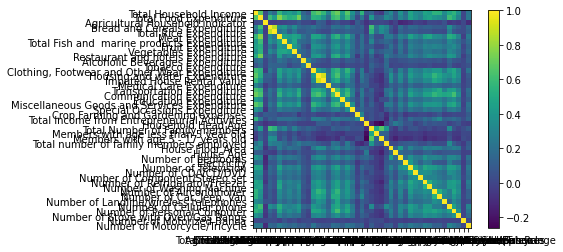

In [ ]:
#ヒートマップにして可視化する
plt.imshow(cor_f, interpolation="none")
plt.colorbar()
plt.xticks(range(len(cor_f)), cor_f.columns)
plt.yticks(range(len(cor_f)), cor_f.columns)

### 重回帰分析

In [ ]:
import sklearn

In [ ]:
Xf = X.drop("Total Household Income", axis=1)
yf = X["Total Household Income"]
print(X.shape, Xf.shape, yf.shape)

(41544, 555) (41544, 554) (41544,)


In [ ]:
# 学習用データと評価用データに分割
from sklearn.model_selection import train_test_split

RATE_TEST = 0.3
Xf_train, Xf_test, yf_train, yf_test = train_test_split(Xf, yf, test_size=RATE_TEST, random_state=1)
print("学習用", Xf_train.shape, "評価用", Xf_test.shape, "学習用", yf_train.shape, "評価用", yf_test.shape)

学習用 (29080, 554) 評価用 (12464, 554) 学習用 (29080,) 評価用 (12464,)


In [ ]:
# 標準化する
from sklearn.preprocessing import StandardScaler

sc_f = StandardScaler()
sc_f.fit(Xf_train)
Xf_train_stand = sc_f.transform(Xf_train)
Xf_test_stand = sc_f.transform(Xf_test)
yf_train_stand = (yf_train - yf_train.mean())/yf_train.std()
yf_test_stand = (yf_test - yf_train.mean())/yf_train.std()

In [ ]:
#重回帰分析のパッケージをインポート
from sklearn.linear_model import LinearRegression

#重回帰分析をする
lr = LinearRegression().fit(Xf_train_stand, yf_train_stand)

RMSE： 3421554683901638.0


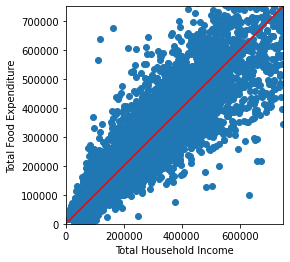

In [ ]:
yf_predict = lr.predict(Xf_test_stand) * yf_train.std() + yf_train.mean()

# 実績値（Actual quality）と予測値（Predicted quality）との散布図を作成し、精度を確認する
plt.scatter(yf_test, yf_predict)
plt.plot(range(2,750000), range(2,750000),color="red")
plt.xlim(0,750000)
plt.ylim(0,750000)
plt.xlabel("Total Household Income")
plt.ylabel("Total Food Expenditure")
plt.gca().set_aspect("equal", adjustable="box")

# 誤差の評価
rmse = np.sqrt(sum((yf_test - yf_predict) ** 2) / len(yf_test))
print("RMSE：", rmse)

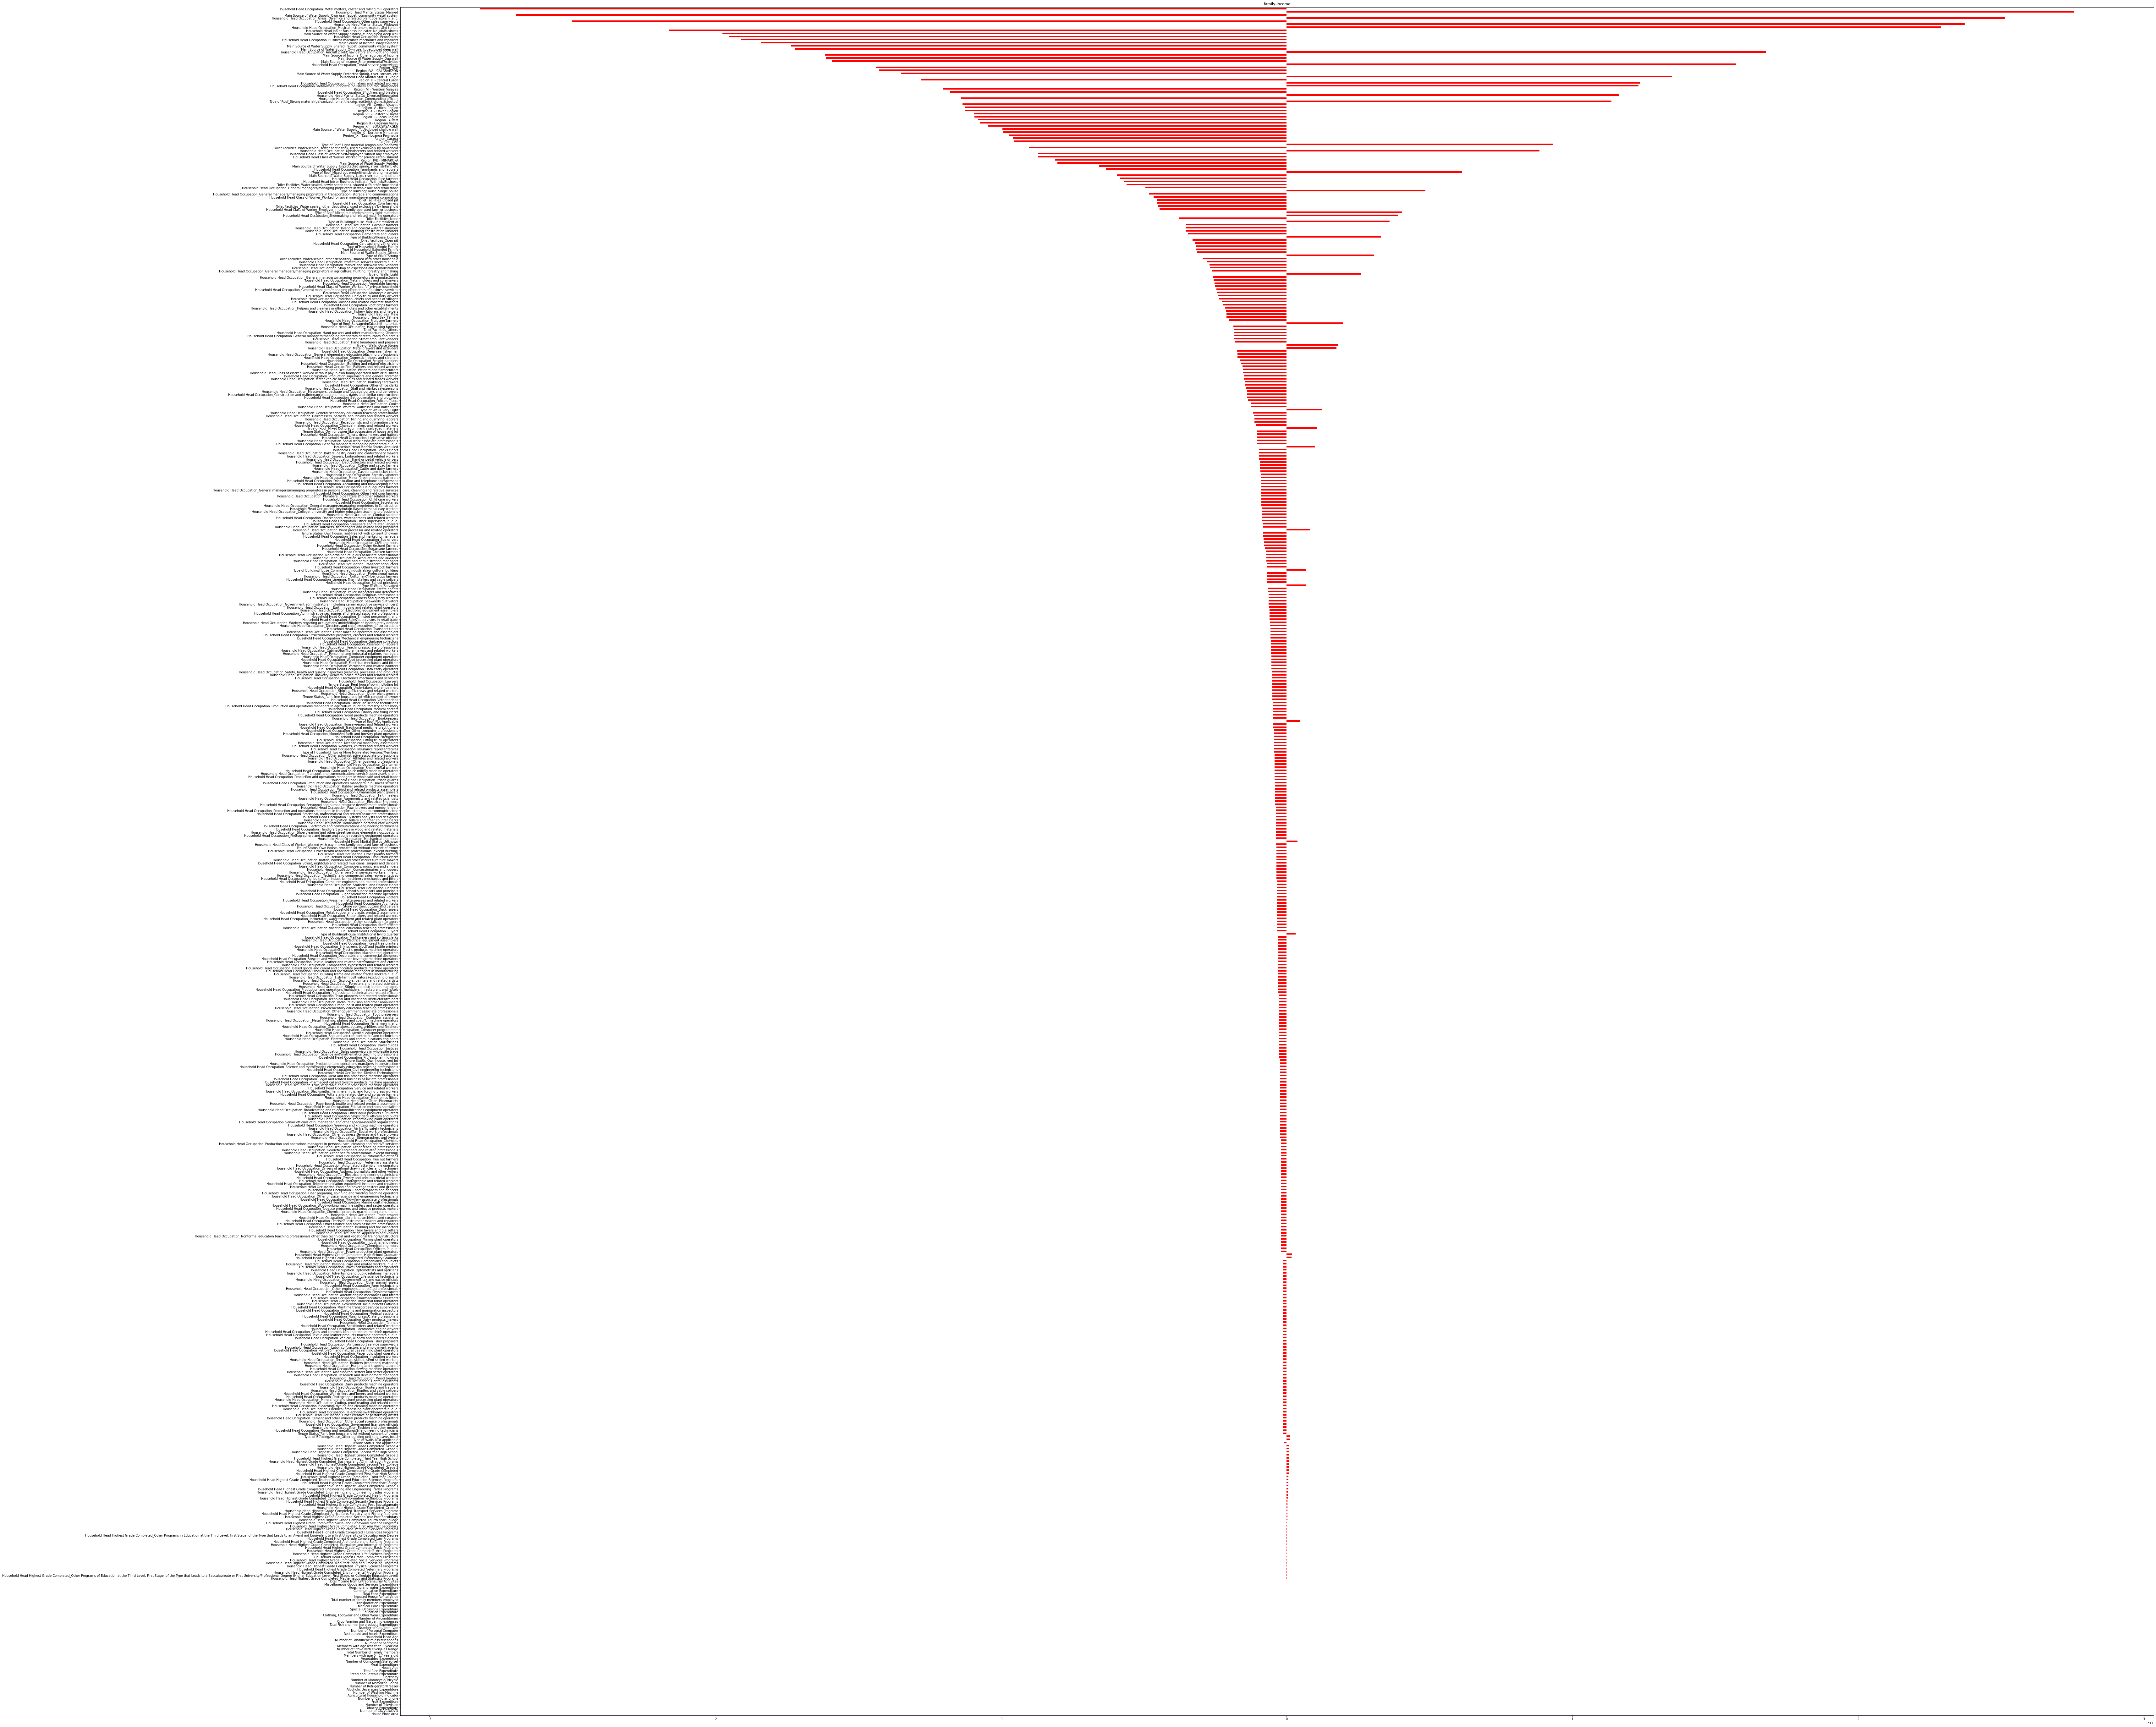

In [ ]:
#変数の影響を見る

df_coef = pd.DataFrame({"Coef":lr.coef_, "Coef_abs":np.abs(lr.coef_)})
df_coef.index = Xf.columns
df_coef = df_coef.sort_values(by="Coef_abs")
df_coef["Coef"].plot(kind="barh", title="family-income", color="red",figsize=(100,100))